
$\textbf{Taller 1 Metodos Computacionales 2}$

$\textbf{Punto 1}$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
def fourier(ts,ys,fs):
    N=np.size(ts)
    summ=0
    for i in range(N):
        val=0
        val=ys[i]*np.exp(2*np.pi*1j*ts[i]*fs)
        summ+=val
    return summ

$\textbf{Punto 2}$

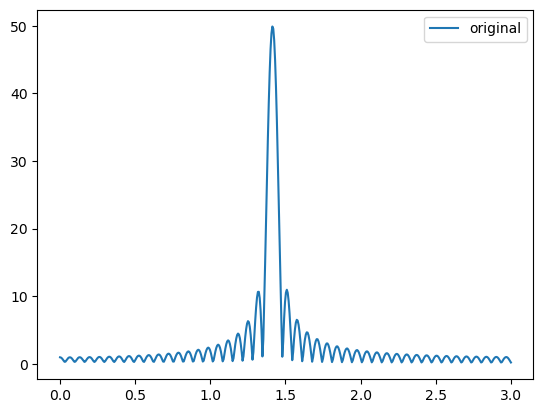

In [2]:
t=np.linspace(0,15,100)
y=np.sin(2*np.pi*np.sqrt(2)*t)

f=np.linspace(0,3,500)

def transformada_ft(ts, ys,f_array):
    N=len(f_array)
    vl=np.zeros(N)

    for i in range(N):
        vl[i]=abs(fourier(ts, ys, f_array[i]))
        
    return vl
    
def grafica_transformada(ts, ys,f_array,nombre:str):
    
    vl=transformada_ft(ts,ys,f_array)  
    plt.plot(f_array, vl,label=nombre)
    plt.legend()
    


grafica_transformada(t,y,f,"original")
plt.show()

Ahora para resolver el siguiente punto, reviaremos que sucede si le agregamos ruido a la señal 

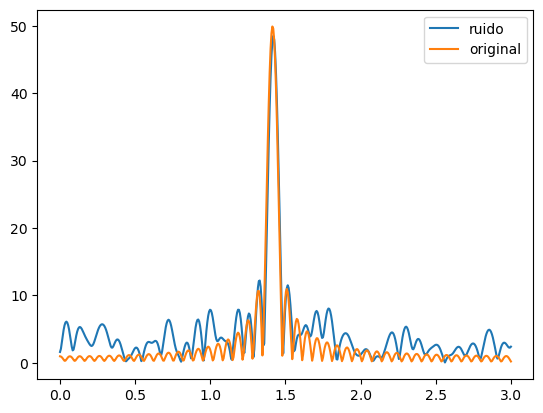

In [3]:
ruido = np.random.normal(0, 0.33, len(y))
y_rand = y + ruido

grafica_transformada(t,y_rand,f,"ruido")
grafica_transformada(t,y,f,"original")
plt.show()



Por lo tanto, podemos evidenciar que añadir ruido, este aumentara la magnitud de de las transformadas de las otras frecuencias, sin embargo, la frecuencia correcta sigue siendo identificable.

$\textbf{Punto 3}$

Para encontrar el pico maximo y el ancho de media altura se hara lo siguiente 


In [4]:
def pico_y_ancho(ts,ys,fs):
    Fvalores=transformada_ft(ts,ys,fs)

    ind_max=np.argmax(Fvalores)

    fmax=fs[ind_max]
    Imax=Fvalores[ind_max]

    print("la frecuancia en al que se encuentra el pico es",fmax,"Hz")

    Imedio=np.argmin(abs(Fvalores-(Imax/2)))
    FWHM=2*abs(fs[Imedio]-fmax)
    print("y el ancho a media altura FWHM es",FWHM,"Hz")

pico_y_ancho(t,y,f)


la frecuancia en al que se encuentra el pico es 1.4128256513026052 Hz
y el ancho a media altura FWHM es 0.08416833667334656 Hz


$\textbf{Ahora revisando el numeral a) y b)}$

Entonces para $\textbf{a)}$

In [5]:
t_Ndistinto=np.linspace(0,15,200)
y_Ndistinto=np.sin(2*np.pi*np.sqrt(2)*t_Ndistinto)

print("Al cambiar N de 100 a 200")
pico_y_ancho(t_Ndistinto,y_Ndistinto,f)

Al cambiar N de 100 a 200
la frecuancia en al que se encuentra el pico es 1.4128256513026052 Hz
y el ancho a media altura FWHM es 0.08416833667334656 Hz


Si se cambia el numero de muestras N, no cambian ni el pico ni el ancho.

Ahora para $\textbf{b)}$

In [6]:
t_t_maxdist1=np.linspace(0,20,100)
y_t_maxdist1=np.sin(2*np.pi*np.sqrt(2)*t_t_maxdist1)

print("para un tmax de 20")
pico_y_ancho(t_t_maxdist1,y_t_maxdist1,f)

t_t_maxdist2=np.linspace(0,10,100)
y_t_maxdist2=np.sin(2*np.pi*np.sqrt(2)*t_t_maxdist2)

print("")
print("para un tmax de 10")
pico_y_ancho(t_t_maxdist2,y_t_maxdist2,f)



para un tmax de 20
la frecuancia en al que se encuentra el pico es 1.4128256513026052 Hz
y el ancho a media altura FWHM es 0.06012024048096176 Hz

para un tmax de 10
la frecuancia en al que se encuentra el pico es 1.4128256513026052 Hz
y el ancho a media altura FWHM es 0.12024048096192397 Hz


Para este caso en donde cambia $t_{max}$, la frecuencia del pico no cambia, sin embargo, el ancho si cambia inversamente proporcional al cambio de $t_{max}$

$\textbf{Punto 4}$


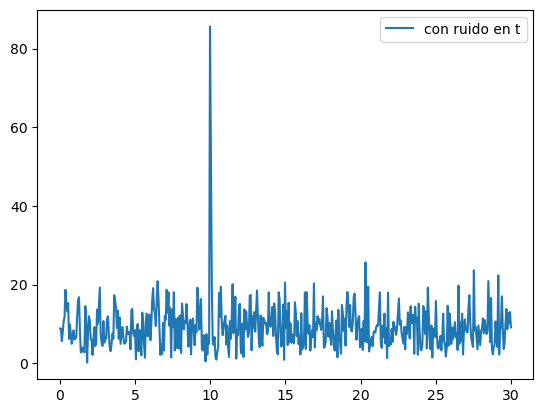

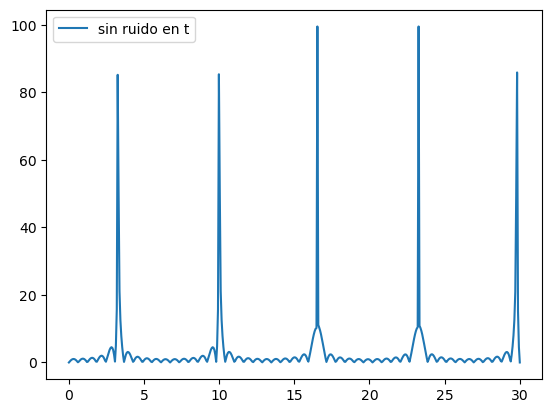

In [33]:
N = 200
ts_0 = np.linspace(0,15,N)
# f de Nyquist=6.66Hz
ts = ts_0 + np.random.normal(0.,0.15,N)
f_0=10
ys = np.sin(2*np.pi*ts*f_0)

fsf=np.linspace(0,30,500)

#grafica_transformada(ts_0,ys,fsf,"si")
grafica_transformada(ts,ys,fsf,"con ruido en t")
plt.show()

ys_0 = np.sin(2*np.pi*ts_0*f_0)
grafica_transformada(ts_0,ys_0,fsf,"sin ruido en t")
plt.show()


Siendo f=6.6Hz la frecuencia de Nyquist, y f=10Hz la frecuecia de la señal de prueba, podemos ver que aunque haya mas picos, es evidente que f=10 hz es la frecuencia real, situacion que no sucede en la grafica sin ruido en t. Por lo tanto, si es posible recuperar la frecuencia original.

$\textbf{Punto 5}$

In [43]:
import requests


# Paso 1: Descargar el archivo desde el link
url = 'https://www.astrouw.edu.pl/ogle/ogle4/OCVS/lmc/cep/phot/I/OGLE-LMC-CEP-0001.dat'
response = requests.get(url)

# Paso 2: Leer los datos y procesar las columnas
data = response.text.strip().splitlines()
column1, column2, column3 = [], [], []

for line in data:
    col1, col2, col3 = line.split()
    column1.append(float(col1))  # Convertimos a float si es necesario
    column2.append(float(col2))
    column3.append(float(col3))

# Paso 3: Convertir las listas en arrays de numpy
t5 = np.array(column1)
y5 = np.array(column2)
sig_y5 = np.array(column3)

In [70]:
from statistics import mode
delta_t=np.diff(t5)
val_d_t=mode(delta_t)


y5f=y5-y5.mean()


$\textbf{frecuencia principal y frecuencia de muestreo}$

La frecuencia principal de la señal es 3.26 Hz y la frecuencia de muestreo de los datos es 0.5


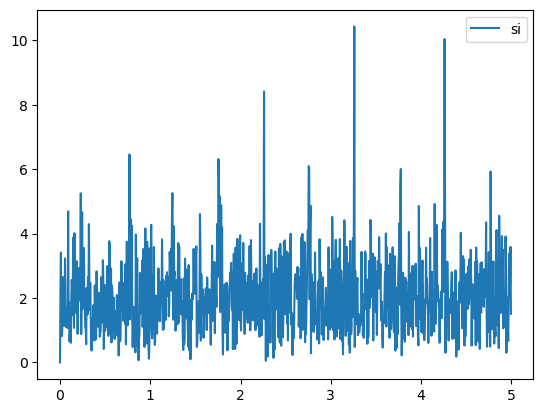

In [69]:
f5=np.arange(0,5,0.005)
grafica_transformada(t5,y5f,f5,"si")
Ft5=transformada_ft(t5,y5f,f5)
inmax=np.argmax(Ft5)
frec_max=round(f5[inmax],2)

print("La frecuencia principal de la señal es",frec_max,"Hz y la frecuencia de muestreo de los datos es",round(1/val_d_t,2))


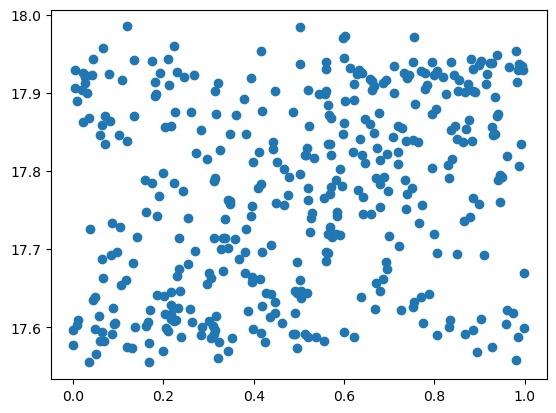

In [72]:

phi=np.mod(t5*frec_max,1)

plt.scatter(phi, y5)
